In [1]:
import numpy as np
import pandas as pd

import torch

In [2]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [3]:
matplotlib.rc('font', size=14)

In [4]:
import sys

In [5]:
from copy import deepcopy

In [6]:
sys.path.append('../')
sys.path.append('../../')

In [7]:
train_target = pd.read_csv('../scenario_age_pred/data/train_target.csv')
train_target.head(5)

,client_id,bins
0,24662,2
1,1046,0
2,34089,2
3,34848,1
4,47076,3


In [9]:
df_vectors = pd.read_pickle('../scenario_age_pred/data/mles_embeddings.pickle').set_index('client_id')
embedding_columns = df_vectors.columns.tolist()
df_vectors = pd.merge(df_vectors, train_target.set_index('client_id'), left_index=True, right_index=True)
df_vectors.head()

,v000,v001,v002,v003,v004,v005,v006,v007,v008,v009,...,v791,v792,v793,v794,v795,v796,v797,v798,v799,bins
client_id,,,,,,,,,,,,,,,,,,,,,
26,0.000195,-0.000356,0.000616,0.019361,-0.000135,0.000243,0.004702,-0.000305,-0.000361,-0.000434,...,0.000513,-0.000205,0.000365,-0.028893,0.018978,0.006840,-0.000521,0.003327,0.000507,2
61,0.000198,-0.000328,0.000621,0.003036,0.000453,0.000247,0.000884,-0.000179,-0.000363,-0.000672,...,0.004797,-0.000084,0.000321,0.001211,-0.003803,-0.000162,-0.014349,-0.009870,0.000057,1
474,0.000198,-0.000319,0.000614,-0.002325,0.001288,0.000246,0.000743,-0.000696,0.001032,0.000390,...,-0.000783,-0.000167,-0.000090,0.003511,-0.011621,0.004144,-0.000621,0.002270,0.001055,2
1309,0.000195,-0.000312,0.000618,-0.009389,-0.002240,0.000242,0.001581,-0.000334,0.001033,-0.000653,...,0.000114,-0.000199,0.000375,0.003192,0.029718,-0.000657,-0.000304,-0.011220,-0.000270,3
1677,0.000176,-0.000331,0.000572,0.011363,0.000340,0.000220,-0.001805,-0.000240,-0.001337,-0.000334,...,0.002167,-0.000182,0.000296,0.003504,0.003465,0.000619,-0.001214,0.001168,-0.000030,1


In [10]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [11]:
df_pca = df_vectors.copy()

In [12]:
pca = PCA(n_components=32)
pca.fit(df_pca[embedding_columns].values)
np.sum(pca.explained_variance_ratio_)

0.80830693

In [13]:
pca_results = pca.transform(df_pca[embedding_columns].values)
df_pca['_pca_x'] = pca_results[:, 0]
df_pca['_pca_y'] = pca_results[:, 1]

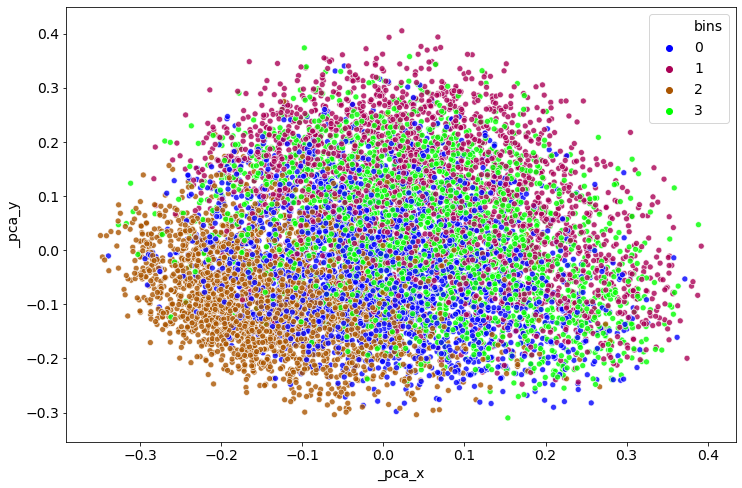

In [14]:
_, axs = plt.subplots(1, 1, figsize=(12, 8))
sns.scatterplot(
    x='_pca_x', y='_pca_y',
    hue='bins',
    # style='bins',
    data=df_pca.sample(n=10000),
    palette='brg',
    alpha=0.8,
    ax=axs,
    markers=['o', 'd', '*' , '.']
)
plt.show()

Относительный порядок категорий: 1 - 3 - 0 - 2

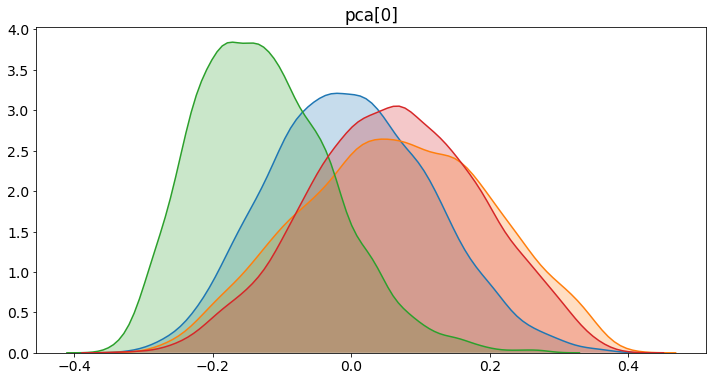

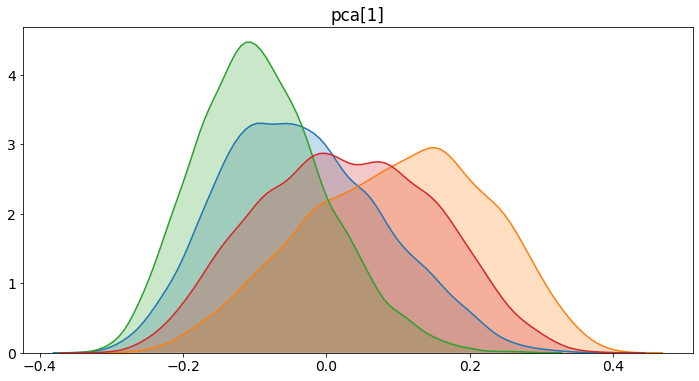

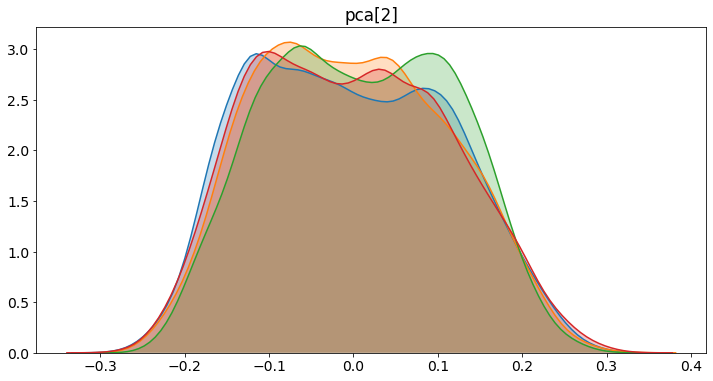

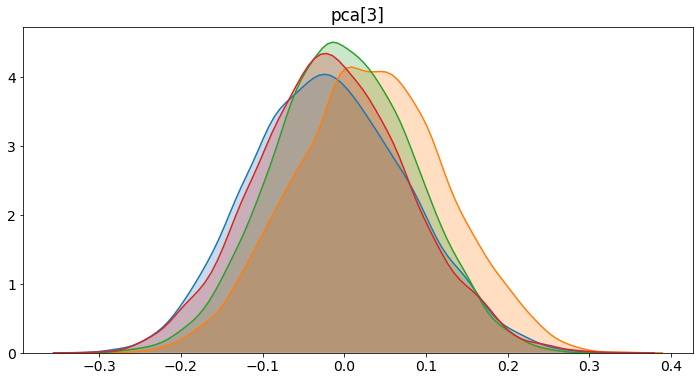

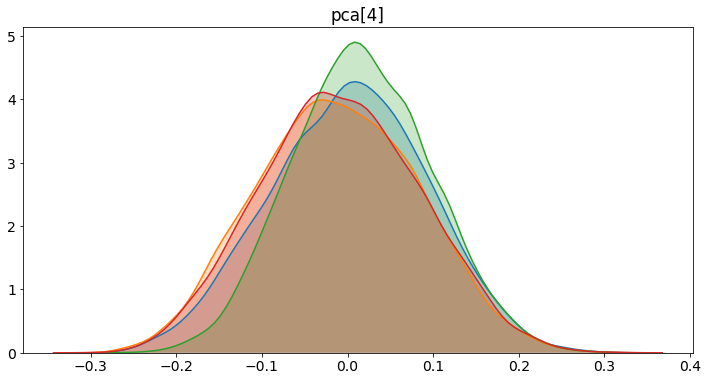

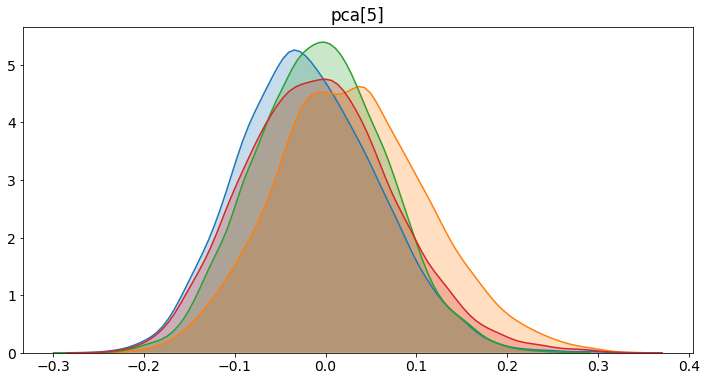

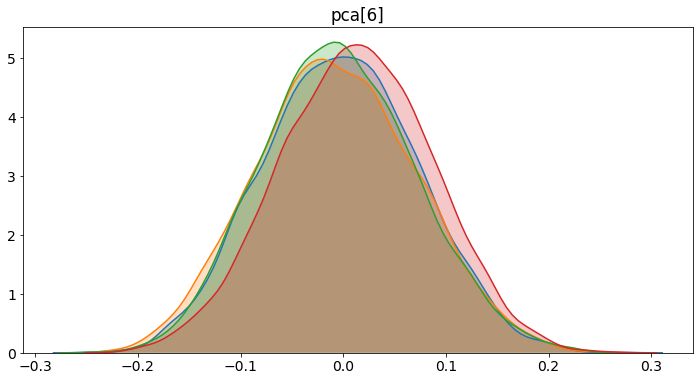

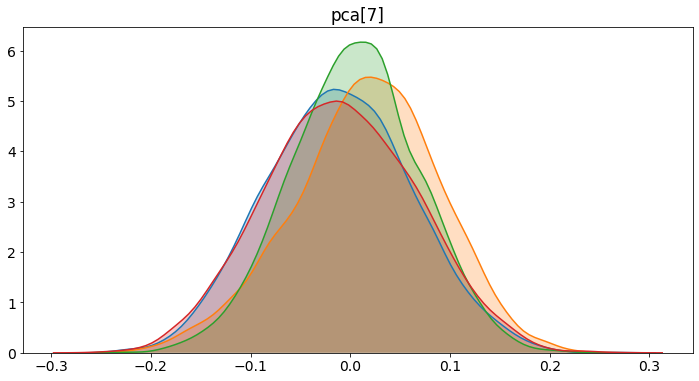

In [15]:
for i in range(8):
    plt.figure(figsize=(12,6))

    for b in [0, 1, 2, 3]:
        ix = np.arange(len(pca_results))[df_pca['bins'].eq(b)]
        sns.kdeplot(pca_results[ix, i], shade=True)
    plt.title(f'pca[{i}]')
    plt.show()

In [16]:
if len(df_pca) > 10000:
    df_tsne = df_pca.sample(n=10000).copy()
else:
    df_tsne = df_pca.copy()

In [17]:
tsne = TSNE(n_components=2, verbose=1, n_iter=300)
tsne_results = tsne.fit_transform(df_tsne[embedding_columns].values)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.813s...
[t-SNE] Computed neighbors for 10000 samples in 150.975s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.118782
[t-SNE] KL divergence after 250 iterations with early exaggeration: 97.393677
[t-SNE] KL divergence after 300 iterations: 4.107378


In [18]:
df_tsne['tSNE[0]'] = tsne_results[:, 0]
df_tsne['tSNE[1]'] = tsne_results[:, 1]

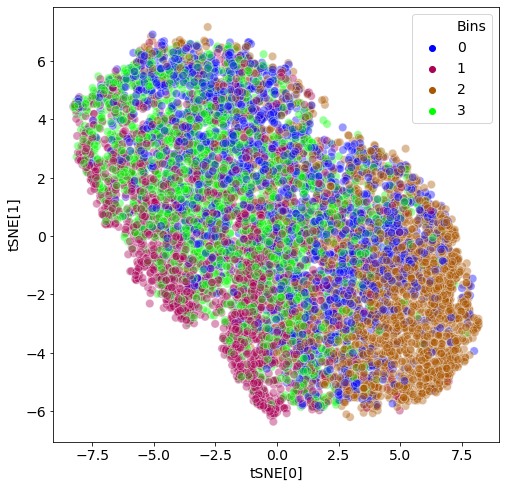

In [19]:
_, axs = plt.subplots(1, 1, figsize=(8, 8))
sns.scatterplot(
    x='tSNE[0]', y='tSNE[1]',
    hue='Bins',
    data=df_tsne.rename(columns={'bins': 'Bins'}),
    palette='brg',
    alpha=0.4, s=70,  
    ax=axs,
)
# plt.show()

plt.savefig('age-pred-tsne.pdf')